# Malaria Convolutional Neural Network
Using deep learning to improve a model that can understand when is parasitized or uninfected by a cell image

___
Using the Tensorflow for models and Tensorflow Datasets to get a cell images of malaria.

[Malaria Dataset](https://www.tensorflow.org/datasets/catalog/malaria)

### Imports

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot

___
### This notebook has the follows steps:
- Load data
- Understand data
- Prepare data
- Build a models
- Train models
- Validate models
- Improve the best model
    * Build model
    * Train model
    * Validate model

## Load data

In [2]:
dataset = tfds.builder('malaria')

In [3]:
dataset.download_and_prepare()

I define the dataset split with 70% of all data is for train, 10% is used for validate the train and 20% is used for data test.

In [4]:
dataset_train, train_info = tfds.load('malaria', split='train[0%:70%]', with_info=True)
dataset_validate, validate_info = tfds.load('malaria', split='train[70%:80%]', with_info=True)
dataset_test, test_info = tfds.load('malaria', split='train[80%:99%]', with_info=True)

## Understand data

In [5]:
dataset.info

tfds.core.DatasetInfo(
    name='malaria',
    version=1.0.0,
    description='The Malaria dataset contains a total of 27,558 cell images
with equal instances of parasitized and uninfected cells from the thin blood 
smear slide images of segmented cells.',
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=27558,
    splits={
        'train': 27558,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward 
      improved malaria parasite detection in thin blood smear images},
      author={Rajaraman, Sivaramakrishnan and Antani, Sameer K and Poostchi, Mahdieh
      and Silamut, Kamolrat and Hossain, Md A and Maude, Richard J and Jaeger, 
      Stefan and Thoma, George R}

In [6]:
train_size = len(list(dataset_train.as_numpy_iterator()))
validate_size = len(list(dataset_validate.as_numpy_iterator()))
test_size = len(list(dataset_test.as_numpy_iterator()))

In [7]:
print(f'The train dataset has {train_size} total of examples')
print(f'The validate dataset has {validate_size} total of examples')
print(f'The test dataset has {test_size} total of examples')

The train dataset has 19291 total of examples
The validate dataset has 2755 total of examples
The test dataset has 5236 total of examples


In [8]:
train_uninfected_size = len(list(dataset_train.filter(lambda x: x['label'] == 1).as_numpy_iterator()))
validate_uninfected_size = len(list(dataset_validate.filter(lambda x: x['label'] == 1).as_numpy_iterator()))
test_uninfected_size = len(list(dataset_test.filter(lambda x: x['label'] == 1).as_numpy_iterator()))

In [9]:
print(f'Into train has {train_uninfected_size} of uninfected examples and {train_size - train_uninfected_size} of parasitized samples.')
print(f'Into validate has {validate_uninfected_size} of uninfected examples and {validate_size - validate_uninfected_size} of parasitized samples.')
print(f'Into test has {test_uninfected_size} of uninfected examples and {test_size - test_uninfected_size} of parasitized samples.')

Into train has 9650 of uninfected examples and 9641 of parasitized samples.
Into validate has 1397 of uninfected examples and 1358 of parasitized samples.
Into test has 2595 of uninfected examples and 2641 of parasitized samples.


#### Item from train split

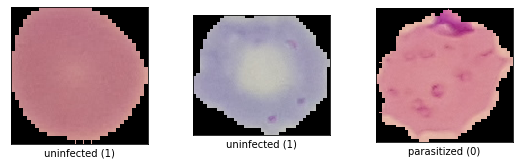

In [10]:
train_figure = tfds.show_examples(train_info, dataset_train, rows=1, cols=3)

#### item from validation split

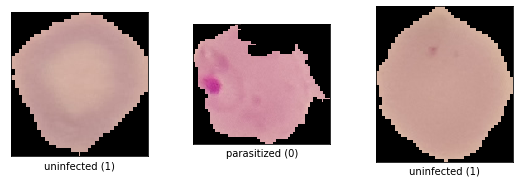

In [11]:
validate_figure = tfds.show_examples(validate_info, dataset_validate, rows=1, cols=3)

#### Item from test split

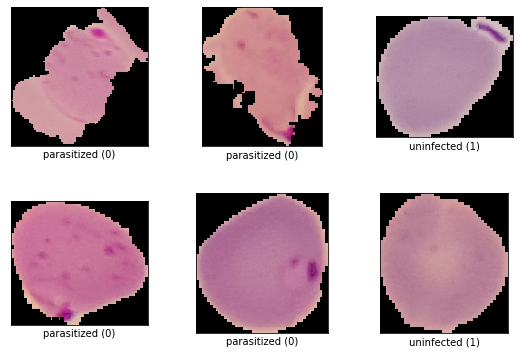

In [12]:
test_figure = tfds.show_examples(test_info, dataset_test, rows=2, cols=3)

## Prepare data

In [62]:
batch_size = 32
epochs = 16
shuffle_size = 1024

In [63]:
train = dataset_train.repeat().shuffle(shuffle_size).batch(batch_size)
validate = dataset_validate.repeat().shuffle(shuffle_size).batch(batch_size)

test = dataset_test.shuffle(shuffle_size)

### Size of image

In [64]:
image_shape = (0, 0, 3)
for example in dataset_train.take(1):
    image_shape = tf.shape(example['image'])

## Build Models

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=[103, 103, 3]),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [80]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 103, 103, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 51, 51, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 51, 64)        9280      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 40000)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               5120128   
_________________________________________________________________
dense_37 (Dense)             (None, 32)              

### Train Model

In [82]:
model.fit(
    train,
    steps_per_epoch=train_size,
    epochs=epochs,
    validation_data=validate,
    validation_steps=validate_size
)

ValueError: in converted code:

    /usr/local/lib/python3.7/dist-packages/tensorflow_core/python/keras/engine/training_v2.py:677 map_fn
        batch_size=None)
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/python/keras/engine/training.py:2410 _standardize_tensors
        exception_prefix='input')
    /usr/local/lib/python3.7/dist-packages/tensorflow_core/python/keras/engine/training_utils.py:510 standardize_input_data
        'for each key in: ' + str(names))

    ValueError: No data provided for "conv2d_input". Need data for each key in: ['conv2d_input']
